In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt 
import numpy as np
import talib as ta
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Infy.csv')
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,522.250000,515.000000,518.849976,516.775024,5431340.0,455.430542
1,2018-01-02,521.000000,511.500000,518.625000,514.849976,6112248.0,453.734009
2,2018-01-03,515.799988,509.299988,514.250000,510.649994,6846552.0,450.032593
3,2018-01-04,510.500000,504.799988,510.500000,507.700012,8947614.0,447.432831
4,2018-01-05,513.200012,503.000000,507.649994,506.000000,11025976.0,445.934631
...,...,...,...,...,...,...,...
1203,2022-11-16,1609.000000,1593.500000,1597.150024,1602.800049,4497697.0,1602.800049
1204,2022-11-17,1602.800049,1582.949951,1597.199951,1587.400024,3469515.0,1587.400024
1205,2022-11-18,1598.000000,1575.500000,1591.699951,1593.400024,3126064.0,1593.400024
1206,2022-11-21,1587.849976,1564.050049,1582.099976,1568.199951,3071764.0,1568.199951


In [3]:
Infy = pd.DataFrame({"Date": data['Date'], "Close":
data["Close"]})
Infy = Infy.set_index('Date')
Infy

,Close
Date,
2018-01-01,516.775024
2018-01-02,514.849976
2018-01-03,510.649994
2018-01-04,507.700012
2018-01-05,506.000000
...,...
2022-11-16,1602.800049
2022-11-17,1587.400024
2022-11-18,1593.400024


In [4]:
# حساب متوسط التحرك البسيط بثلثين خطوة  
Infy['MA'] = ta.SMA(Infy['Close'],30)
Infy['MA']

Date
2018-01-01            NaN
2018-01-02            NaN
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
                 ...     
2022-11-16    1502.738330
2022-11-17    1509.193331
2022-11-18    1514.659998
2022-11-21    1518.428328
2022-11-22    1522.564998
Name: MA, Length: 1208, dtype: float64

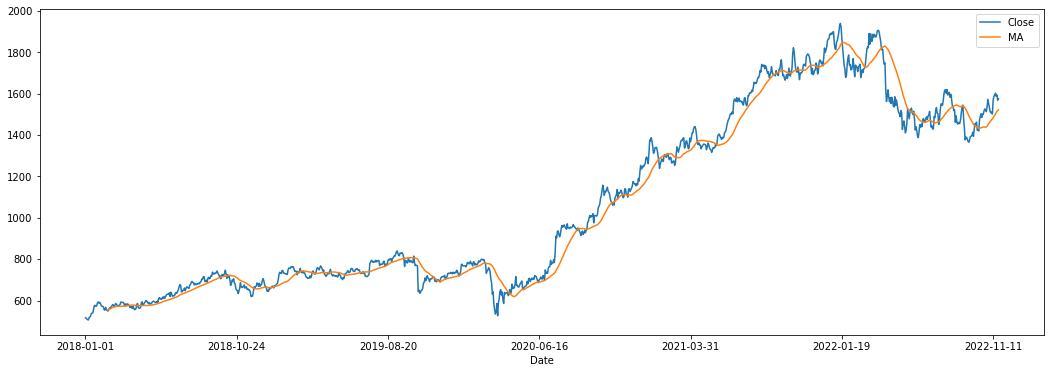

In [5]:
# مقارنة متوسط التجرك البسيط  بسعر الإغلاق
# إذا كان السعر أعلى من متوسط الحركة فإن الإتجاه صاعد
# إذا كان السعر أقل من متوسط الحركة فإن الإتجاه هابط
# قد يتختلف بإختلاف الخطوات
Infy[['Close','MA']].plot(figsize=(18,6))
plt.show()

In [6]:
# positions_long  شراء بسعر منخفض بيع بسعر مرتفع
Infy['positions_long'] = np.nan
for x in range (len(Infy)):
    if Infy.Close[x] > Infy.MA[x]: # هنا سعر الإغلاق أعلى 
        Infy['positions_long'][x] = 1
    if Infy.Close[x] <= Infy.MA[x]: # هنا سعر الإغلاق أدنى 
        Infy['positions_long'][x] = 0 
Infy['positions_long'] = Infy['positions_long'].fillna(method='ffill')
Infy['positions_long'].value_counts()

1.0    772
0.0    407
Name: positions_long, dtype: int64

<AxesSubplot:xlabel='Date'>

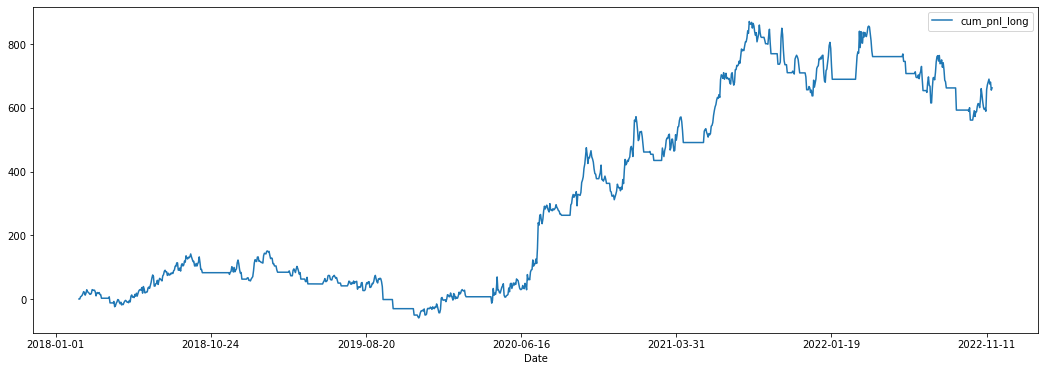

In [7]:
Infy['price_difference']= Infy.Close - Infy.Close.shift(1) # فرق الأسعار اليومية 
# profit and loss = pnl
Infy['pnl_long'] = Infy.positions_long.shift(1) * Infy.price_difference #   الربح والخسارة
Infy['cum_pnl_long'] = Infy.pnl_long.cumsum() # الربح والخسارة التراكمي
Infy[['cum_pnl_long']].plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

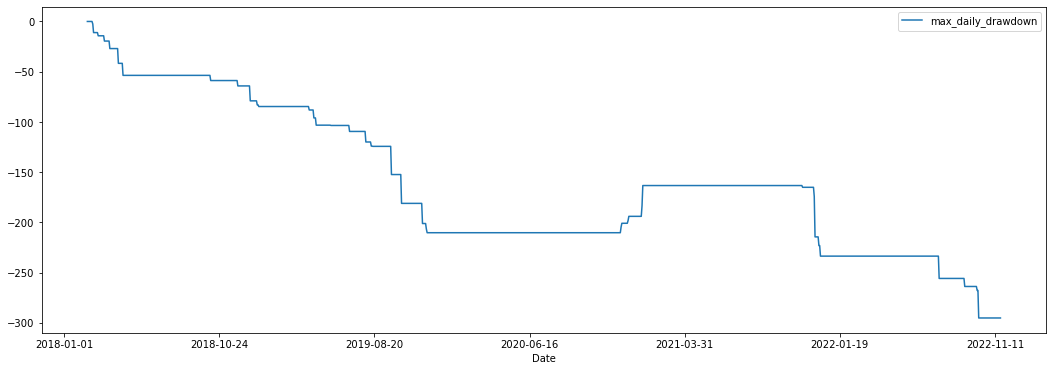

In [8]:
# min_periods  تبقي على القيم من دون جعلها قيم مفقودة قبل 250 بحيث أقل فترة بين القيم المفقودة وغير المفقودة 1 كي نعدها غير مفقودة   
Infy['rolling_max'] = Infy['cum_pnl_long'].rolling(250,min_periods=1).max()
Infy['daily_drawdown'] = Infy['cum_pnl_long']-Infy['rolling_max']
Infy['max_daily_drawdown'] = Infy['daily_drawdown'].rolling(250,min_periods=1).min()
Infy[['max_daily_drawdown']].plot(figsize=(18,6))